In [1]:
import tensorflow as tf
import numpy as np

# MNIST Dataset
(x_train_i, y_train_i), (x_test_i, y_test_i) = tf.keras.datasets.mnist.load_data()

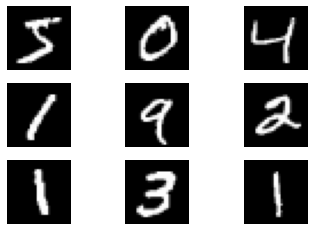

In [2]:
import matplotlib.pyplot as plt

def plot_as_grid(arr):
    '''
    Plot set of images as a grid
    '''
    for i in range(len(arr)):
        plt.subplot(330 + 1 + i)
        plt.axis('off')
        plt.imshow(arr[i], cmap=plt.get_cmap('gray'))

plot_as_grid(x_train_i[:9])
plt.show()

In [3]:
# Processing

# Normalization
x_train = x_train_i.astype("float32") / 255
x_test = x_test_i.astype("float32") / 255

# Shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train_i, 10)
y_test = tf.keras.utils.to_categorical(y_test_i, 10)

input_shape = x_train[0].shape
input_shape

(28, 28, 1)

In [4]:
import tensorflow as tf

# Single Conv Layer CNN
model = tf.keras.Sequential(
    [
        
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)), 
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(), 
        tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
batch_size = 128
epochs = 15

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 24s 55ms/step - loss: 0.1820 - accuracy: 0.9446 - val_loss: 0.0757 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0620 - accuracy: 0.9804 - val_loss: 0.0603 - val_accuracy: 0.9825
Epoch 3/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0605 - val_accuracy: 0.9842
Epoch 4/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0263 - accuracy: 0.9918 - val_loss: 0.0608 - val_accuracy: 0.9837
Epoch 5/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.0496 - val_accuracy: 0.9857
Epoch 6/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0136 - accuracy: 0.9959 - val_loss: 0.0560 - val_accuracy: 0.9873
Epoch 7/15
422/422 [==============================] - 22s 53ms/step - loss: 0.0115 - accuracy: 0.9967 - val_loss: 0.0572 - val_accuracy:

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05767565220594406
Test accuracy: 0.9857000112533569


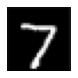

In [7]:
import cv2

filenames = ['7_image1.png']
test_images = []

for fn in filenames:
    test_img = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)
    test_img = cv2.resize(test_img, (28, 28), interpolation = cv2.INTER_AREA)
    test_img = test_img.astype("float32") / 255
    test_images.append(test_img)


plot_as_grid(test_images)

In [9]:
test_images = np.array(test_images)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

predictions = np.argmax(model.predict(test_images), axis=-1)
predictions

array([7])